In [2]:
#import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

data = pd.read_excel("./Distillation Column Dataset.xlsx")

In [3]:
# Check for NaN values in the dataset
data.isna().sum()


Time              0
Sensor1           0
Sensor2           0
Sensor3           0
Sensor4           0
Sensor5           0
Sensor6           0
Sensor7           0
Sensor8           0
Sensor9           0
Sensor10          0
Sensor11          0
Sensor12          0
Sensor13          0
Sensor14          0
Sensor15          0
Sensor16          0
MoleFractionTX    0
MoleFractionHX    0
dtype: int64

In [4]:
data.corr()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,MoleFractionTX,MoleFractionHX
Time,1.000000,-0.019574,-0.029011,-0.368683,-0.513477,-0.512541,-0.492081,0.302717,-0.187222,NaN,NaN,-0.294419,-0.018131,-0.018131,-0.018131,0.500055,NaN,0.516353,-0.516352
Sensor1,-0.019574,1.000000,0.746864,0.050232,-0.007076,-0.010455,0.042869,-0.056226,0.114151,NaN,NaN,0.833498,0.958142,0.958142,0.958142,-0.065869,NaN,0.031536,-0.031535
Sensor2,-0.029011,0.746864,1.000000,0.105490,0.076542,0.084225,0.186376,0.058721,0.535252,NaN,NaN,0.659595,0.603224,0.603224,0.603224,-0.170118,NaN,0.026545,-0.026544
Sensor3,-0.368683,0.050232,0.105490,1.000000,0.822167,0.823246,0.799410,-0.460723,0.317811,NaN,NaN,0.465501,0.048020,0.048020,0.048020,-0.745673,NaN,-0.815105,0.815104
Sensor4,-0.513477,-0.007076,0.076542,0.822167,1.000000,0.998642,0.959892,-0.552521,0.441386,NaN,NaN,0.479340,-0.017119,-0.017119,-0.017119,-0.916069,NaN,-0.959240,0.959240
Sensor5,-0.512541,-0.010455,0.084225,0.823246,0.998642,1.000000,0.959797,-0.529631,0.448470,NaN,NaN,0.480445,-0.018120,-0.018120,-0.018120,-0.911593,NaN,-0.961166,0.961166
Sensor6,-0.492081,0.042869,0.186376,0.799410,0.959892,0.959797,1.000000,-0.662790,0.409924,NaN,NaN,0.518584,-0.020238,-0.020238,-0.020238,-0.969132,NaN,-0.941967,0.941967
Sensor7,0.302717,-0.056226,0.058721,-0.460723,-0.552521,-0.529631,-0.662790,1.000000,0.117106,NaN,NaN,-0.313934,0.049303,0.049303,0.049303,0.738440,NaN,0.590367,-0.590366
Sensor8,-0.187222,0.114151,0.535252,0.317811,0.441386,0.448470,0.409924,0.117106,1.000000,NaN,NaN,0.202800,-0.002392,-0.002392,-0.002392,-0.369369,NaN,-0.226468,0.226469
Sensor9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,MoleFractionTX,MoleFractionHX
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,9.610000e+02,9.610000e+02,961.000000,961.000000,961.000000,961.000000,961.000000,961.0,961.000000,961.000000
mean,14400.000000,49.994889,101.279649,49.555769,3823.335379,6865.768293,2805.781415,1053.164047,0.055029,5.010010e-01,4.989990e-01,76.835812,104.424765,110.492765,67.313865,0.809068,0.0,0.964015,0.035985
std,8326.833132,0.292281,0.452364,6.118368,511.213382,755.410384,259.579392,4.997380,0.003787,1.133017e-14,1.116355e-14,0.334343,0.280159,0.280159,0.280159,0.161491,0.0,0.008473,0.008473
min,0.000000,48.907668,97.702103,36.812829,3004.403494,5653.363002,2134.576770,1013.589114,0.028320,5.010010e-01,4.989990e-01,75.991528,103.930595,109.998595,66.819695,0.571794,0.0,0.950885,0.022401
25%,7200.000000,49.754926,101.033896,44.564921,3408.090531,6252.664563,2601.983148,1049.884770,0.053854,5.010010e-01,4.989990e-01,76.601021,104.183922,110.251922,67.073022,0.639547,0.0,0.957287,0.028810
50%,14400.000000,50.001056,101.296977,50.455106,3722.752040,6718.275361,2756.461191,1053.220322,0.054807,5.010010e-01,4.989990e-01,76.832795,104.426582,110.494582,67.315682,0.807521,0.0,0.965902,0.034098
75%,21600.000000,50.225012,101.539019,54.766717,4450.433352,7406.035409,3111.691346,1055.451884,0.056485,5.010010e-01,4.989990e-01,77.085614,104.649155,110.717155,67.538255,0.914706,0.0,0.971190,0.042713
max,28800.000000,50.807513,103.848213,57.890626,4562.816420,7957.048708,3300.394030,1084.786368,0.084926,5.010010e-01,4.989990e-01,77.891430,104.929458,110.997458,67.818558,1.644580,0.0,0.977599,0.049115


In [6]:
# Drop columns Sensor9, Sensor10, and Sensor16. (they have the same value in each row)
data_cleaned = data.drop(columns=['Sensor9', 'Sensor10', 'Sensor16'])

In [7]:
# Display basic statistics of the dataset
data_cleaned.describe()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,14400.000000,49.994889,101.279649,49.555769,3823.335379,6865.768293,2805.781415,1053.164047,0.055029,76.835812,104.424765,110.492765,67.313865,0.809068,0.964015,0.035985
std,8326.833132,0.292281,0.452364,6.118368,511.213382,755.410384,259.579392,4.997380,0.003787,0.334343,0.280159,0.280159,0.280159,0.161491,0.008473,0.008473
min,0.000000,48.907668,97.702103,36.812829,3004.403494,5653.363002,2134.576770,1013.589114,0.028320,75.991528,103.930595,109.998595,66.819695,0.571794,0.950885,0.022401
25%,7200.000000,49.754926,101.033896,44.564921,3408.090531,6252.664563,2601.983148,1049.884770,0.053854,76.601021,104.183922,110.251922,67.073022,0.639547,0.957287,0.028810
50%,14400.000000,50.001056,101.296977,50.455106,3722.752040,6718.275361,2756.461191,1053.220322,0.054807,76.832795,104.426582,110.494582,67.315682,0.807521,0.965902,0.034098
75%,21600.000000,50.225012,101.539019,54.766717,4450.433352,7406.035409,3111.691346,1055.451884,0.056485,77.085614,104.649155,110.717155,67.538255,0.914706,0.971190,0.042713
max,28800.000000,50.807513,103.848213,57.890626,4562.816420,7957.048708,3300.394030,1084.786368,0.084926,77.891430,104.929458,110.997458,67.818558,1.644580,0.977599,0.049115


In [8]:
# Correlation matrix
correlation_matrix = data_cleaned.corr()

# Extract the correlation of each feature with MoleFractionTX
correlation_with_target = correlation_matrix['MoleFractionTX'].sort_values(ascending=False)
print(correlation_with_target)

MoleFractionTX    1.000000
Sensor15          0.887787
Sensor7           0.590367
Time              0.516353
Sensor1           0.031536
Sensor2           0.026545
Sensor13          0.020722
Sensor14          0.020722
Sensor12          0.020722
Sensor8          -0.226468
Sensor11         -0.481795
Sensor3          -0.815105
Sensor6          -0.941967
Sensor4          -0.959240
Sensor5          -0.961166
MoleFractionHX   -1.000000
Name: MoleFractionTX, dtype: float64


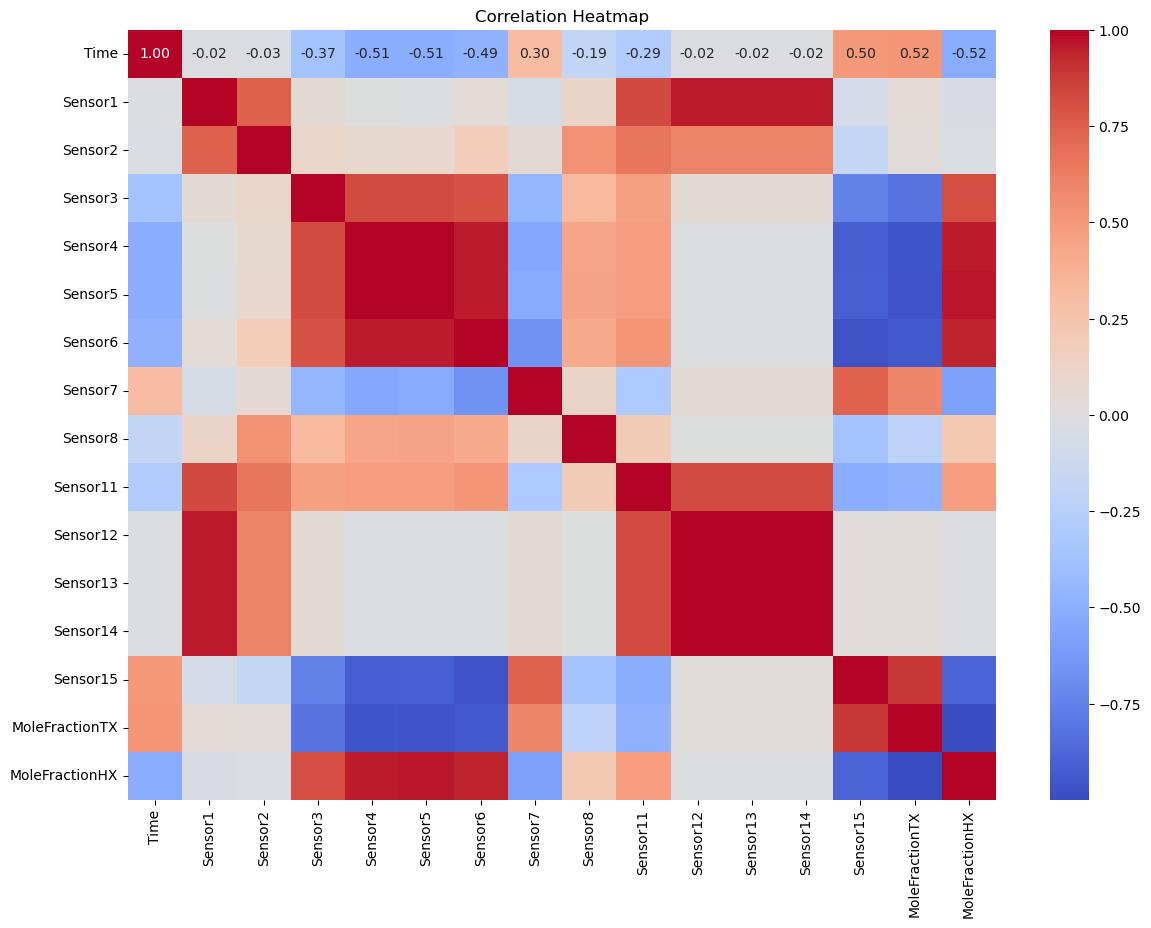

In [9]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


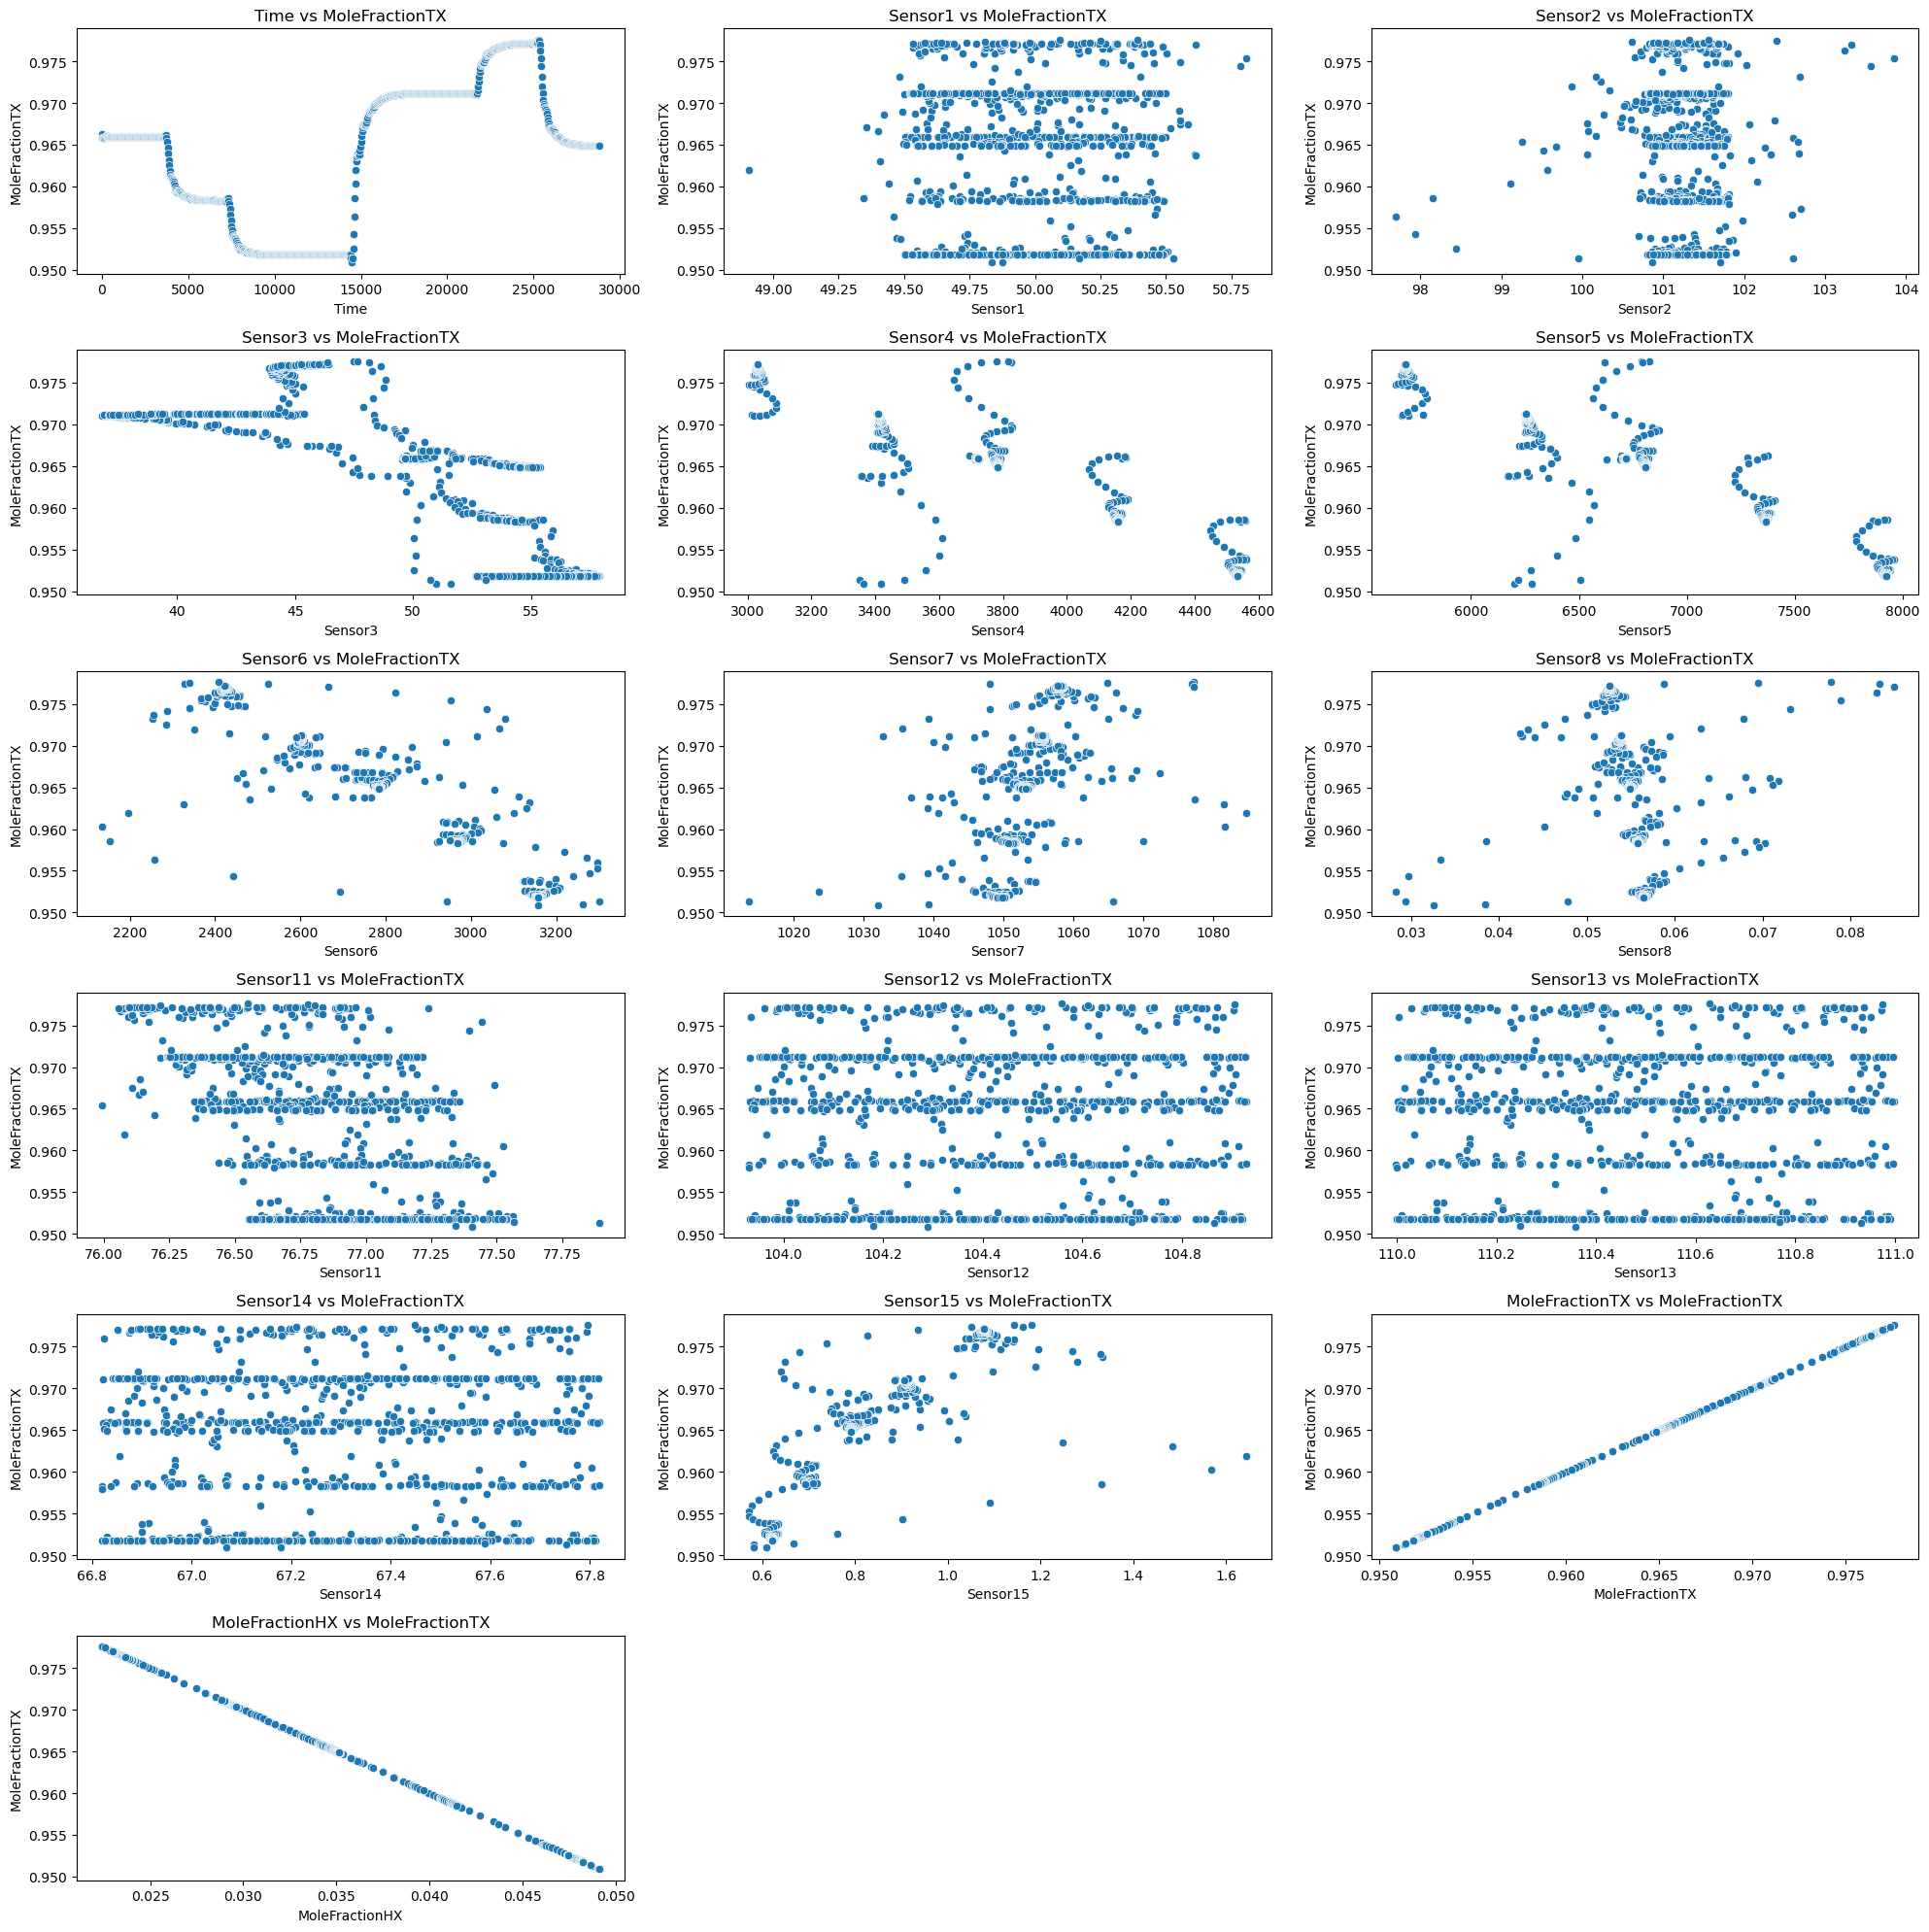

In [10]:
# Scatter plots for MoleFractionTX and each other column
columns = data_cleaned.columns
num_columns = len(columns)

plt.figure(figsize=(20, 20))
for i, column in enumerate(columns, 1):
    plt.subplot(num_columns // 3 + 1, 3, i)
    sns.scatterplot(data=data_cleaned, x=column, y='MoleFractionTX')
    plt.title(f'{column} vs MoleFractionTX')

plt.tight_layout()
plt.show()

c:\Users\papasterc\Miniconda3\envs\sulphurreal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of MoleFractionTX')

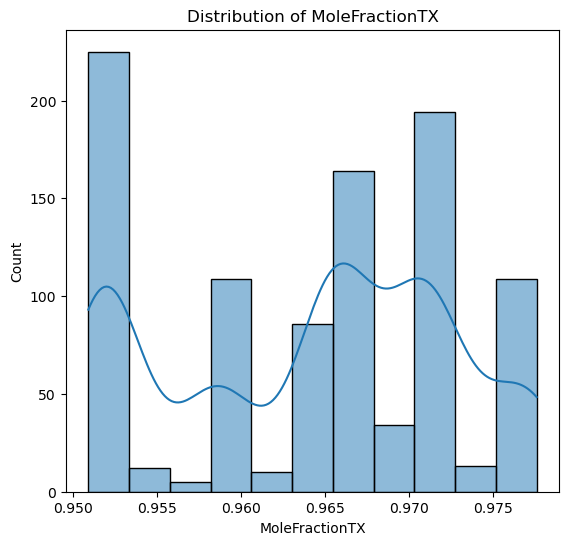

In [11]:
# Distribution Plots
plt.figure(figsize=(14, 6))

# Distribution of MoleFractionTX
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['MoleFractionTX'], kde=True)
plt.title('Distribution of MoleFractionTX')

In [12]:
# Selecting features and target variable
features_cleaned = data_cleaned.drop(columns=['MoleFractionTX', 'MoleFractionHX'])
target = data_cleaned['MoleFractionTX']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_cleaned, target, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Function to compute various performance metrics
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, r2, mae

# Dictionary to store the results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse, rmse, r2, mae = compute_metrics(y_test, y_pred)
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "MAE": mae
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

,Model,MSE,RMSE,R²,MAE
0,Linear Regression,3.765698e-07,0.000614,0.994525,0.000310
1,Decision Tree Regressor,5.193768e-07,0.000721,0.992449,0.000143
2,Random Forest Regressor,3.005498e-07,0.000548,0.995630,0.000130
3,Gradient Boosting Regressor,1.561674e-07,0.000395,0.997730,0.000135
